In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import squarify
from matplotlib import colormaps

In [2]:
# Columnas y filas
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [3]:
# Importar DF
df = pd.read_csv('Berlin_Final.csv', index_col= 0)
df

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,bathrooms_text,amenities,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",within a few hours,f,prenzlauer berg,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,730.0,0,4,4,250,5.0,126,13230.0,4.63000,4.520000,4.920000,4.610000,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",within a day,f,prenzlauer berg,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,94.748079,93.375094,1.0,1.0,7.0,1.0,1.0,1.0,135.000000,6.0,14.0,6.0,14.0,0,0,5,193,7.0,0,0.0,5.00000,5.000000,4.860000,4.860000,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",within a day,t,prenzlauer berg,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...","['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,100.000000,93.375094,4.0,5.0,1.0,1.0,1.0,1.0,75.000000,150.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0,0.0,4.68000,4.850000,4.600000,4.450000,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",within a few hours,f,kreuzberg,1 bath,"[""Iron"", ""Hangers"", ""Wifi"", ""Hair dryer"", ""Pac...",['phone'],t,t,"Berlin, Germany",nördliche luisenstadt,Friedrichshain-Kreuzberg,52.503120,13.435080,Entire condo,Entire home/apt,100.000000,93.375094,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,365.0,0,0,0,0,48.0,0,0.0,4.72000,4.860000,4.670000,4.710000,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,f,copacabana,1 bath,"[""Iron"", ""Wifi"", ""Free street parking"", ""Hot w...","['email', 'phone']",t,t,"Berlin, Germany",reuterstraße,Neukölln,52.494190,13.421660,Entire rental unit,Entire home/apt,100.000000,94.000000,2.0,5.0,2.0,1.0,1.0,1.0,28.000000,92.0,365.0,92.0,365.0,0,0,17,111,5.0,0,0.0,4.77000,4.710000,4.880000,4.650000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",within an hour,f,gropiuss

In [4]:
# Revisar DF y crear copia a trabajar
df_extrac = df.copy()
df_extrac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            14187 non-null  int64  
 1   listing_url                   14187 non-null  object 
 2   last_scraped                  14187 non-null  object 
 3   source                        14187 non-null  object 
 4   name                          14187 non-null  object 
 5   host_id                       14187 non-null  int64  
 6   host_url                      14187 non-null  object 
 7   host_name                     14187 non-null  object 
 8   host_since                    14174 non-null  object 
 9   host_location                 14187 non-null  object 
 10  host_response_time            14187 non-null  object 
 11  host_is_superhost             14187 non-null  object 
 12  host_neighbourhood            14187 non-null  object 
 13  bathro

**Extraer características estadísticas de un análisis univariado a variables categóricas**

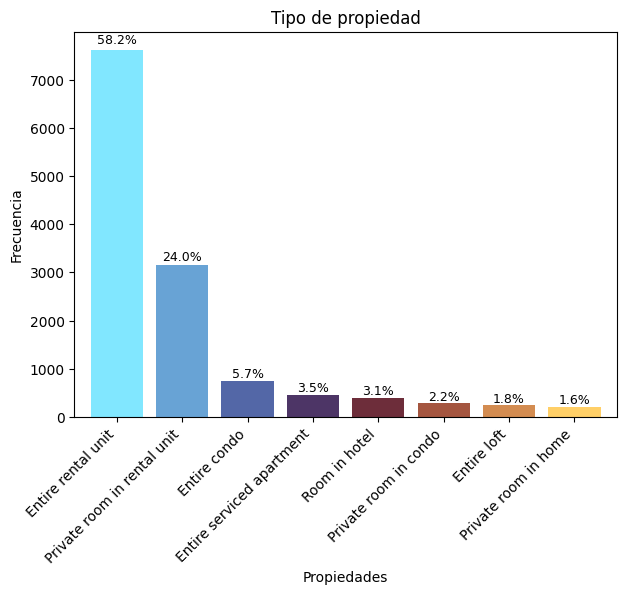

In [5]:
# 1. Análisis univariado property_type
Tabla_freq_prop = df_extrac['property_type'].value_counts().reset_index()
Tabla_freq_prop

# Filtro de valores más relevantes de la variable categórica
Filtro_prop = Tabla_freq_prop[Tabla_freq_prop['count'] > 65].head(8)
Filtro_prop

# Ajustar el índice del DF
Filtro_index_prop = Filtro_prop.set_index('property_type')
Filtro_index_prop

# Calcular porcentajes
Filtro_index_prop['Porcentaje'] = (Filtro_index_prop['count'] / Filtro_index_prop['count'].sum()) * 100

# Escala de colores (usamos viridis, pero puedes cambiarlo a plasma, inferno, coolwarm, etc.)
colors = cm.managua_r(np.linspace(0, 1, len(Filtro_index_prop)))

# Graficar
graph_property_type = Filtro_index_prop['count'].plot(kind='bar', width=0.8, figsize=(7,5), color=colors)

plt.title('Tipo de propiedad')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')

# Añadir etiquetas de porcentaje en cada barra
for i, (value, pct) in enumerate(zip(Filtro_index_prop['count'], Filtro_index_prop['Porcentaje'])):
    graph_property_type.text(i, value + (value * 0.01),  # 1% por encima de la barra
                             f"{pct:.1f}%", 
                             ha='center', va='bottom', fontsize=9)


plt.show()



Text(0, 0.5, 'Frecuencia')

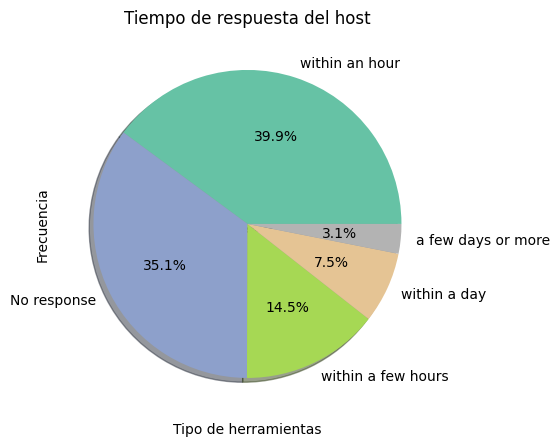

In [6]:
# 3. Análisis univariado host_response_time
Tabla_freq_time = df_extrac['host_response_time'].value_counts().reset_index()
Tabla_freq_time

# Filtro de valores más relevantes de la variable categórica
Filtro_time = Tabla_freq_time[Tabla_freq_time['count'] > 1]
Filtro_time

# Ajustar el índice del DF
Filtro_index_time = Filtro_time.set_index('host_response_time')
Filtro_index_time

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_time['count'].plot(kind= 'pie', figsize= (10,5), shadow = True, autopct = "%0.1f%%", colormap = 'Set2')
plt.title('Tiempo de respuesta del host')
plt.xlabel('Tipo de herramientas')
plt.ylabel('Frecuencia')


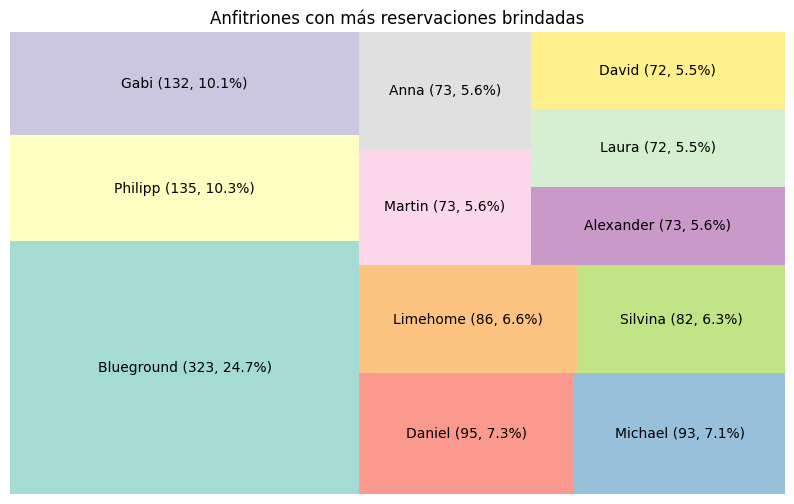

In [25]:
# 7. Análisis univariado 'host_name'
Tabla_freq_host_name = df_extrac['host_name'].value_counts().reset_index()
Tabla_freq_host_name

# Filtro de valores más relevantes de la variable categórica
Filtro_host_names = Tabla_freq_host_name[Tabla_freq_host_name['count'] > 1].head(12)
Filtro_host_names

# Ajustar el índice del DF
Filtro_index_host_names = Filtro_host_names.set_index('host_name')
Filtro_index_host_names

# Calcular porcentajes
Filtro_index_host_names['Porcentaje'] = (Filtro_index_host_names['count'] / Filtro_index_host_names['count'].sum()) * 100

# Crear etiquetas con nombre + conteo + porcentaje
labels = [
    f"{name} ({count}, {pct:.1f}%)"
    for name, count, pct in zip(Filtro_index_host_names.index,
                                Filtro_index_host_names['count'],
                                Filtro_index_host_names['Porcentaje'])
]

# Gráfica treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=Filtro_index_host_names['count'],
    label=labels,
    alpha=0.8,
    color=plt.cm.Set3.colors,
    text_kwargs={'fontsize':10}  # para ajustar tamaño del texto
)

plt.title("Anfitriones con más reservaciones brindadas")
plt.axis("off")
plt.show()




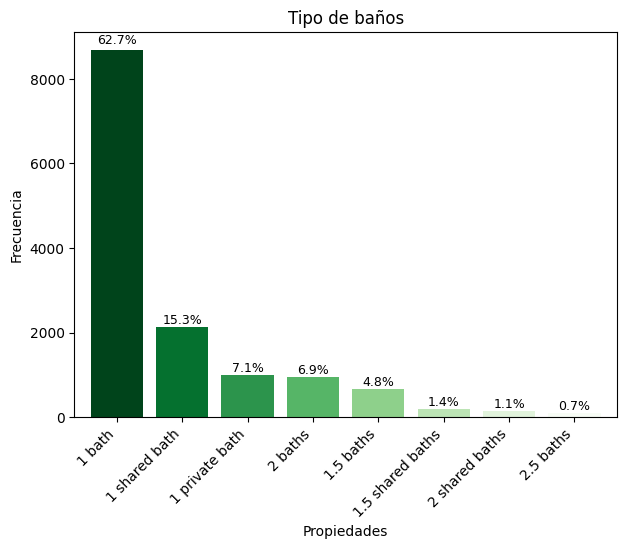

In [35]:
#Análisis univariado Bathrooms_text
Tabla_freq_bath_t = df_extrac['bathrooms_text'].value_counts().reset_index()
Tabla_freq_bath_t

# Filtro de valores más relevantes de la variable categórica
Filtro_bath_t = Tabla_freq_bath_t[Tabla_freq_bath_t['count'] > 1].head(8)
Filtro_bath_t

# Ajustar el índice del DF
Filtro_index_bath_t = Filtro_bath_t.set_index('bathrooms_text')
Filtro_index_bath_t

## Gráfica
# Calcular porcentajes
Filtro_index_bath_t['Porcentaje'] = (Filtro_index_bath_t['count'] / Filtro_index_bath_t['count'].sum()) * 100

# Escala de colores (usamos viridis, pero puedes cambiarlo a plasma, inferno, coolwarm, etc.)
colors = cm.Greens_r(np.linspace(0, 1, len(Filtro_index_bath_t)))

# Graficar
graph_bath_t = Filtro_index_bath_t['count'].plot(kind='bar', width=0.8, figsize=(7,5), color=colors)

plt.title('Tipo de baños')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')

# Añadir etiquetas de porcentaje en cada barra
for i, (value, pct) in enumerate(zip(Filtro_index_bath_t['count'], Filtro_index_bath_t['Porcentaje'])):
    graph_bath_t.text(i, value + (value * 0.01), 
                             f"{pct:.1f}%", 
                             ha='center', va='bottom', fontsize=9)

plt.show()

In [9]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

**Categorizar variables cuantitativas**

In [10]:
#DF
df_extrac

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,bathrooms_text,amenities,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",within a few hours,f,prenzlauer berg,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,730.0,0,4,4,250,5.0,126,13230.0,4.63000,4.520000,4.920000,4.610000,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",within a day,f,prenzlauer berg,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,94.748079,93.375094,1.0,1.0,7.0,1.0,1.0,1.0,135.000000,6.0,14.0,6.0,14.0,0,0,5,193,7.0,0,0.0,5.00000,5.000000,4.860000,4.860000,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",within a day,t,prenzlauer berg,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...","['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,100.000000,93.375094,4.0,5.0,1.0,1.0,1.0,1.0,75.000000,150.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0,0.0,4.68000,4.850000,4.600000,4.450000,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",within a few hours,f,kreuzberg,1 bath,"[""Iron"", ""Hangers"", ""Wifi"", ""Hair dryer"", ""Pac...",['phone'],t,t,"Berlin, Germany",nördliche luisenstadt,Friedrichshain-Kreuzberg,52.503120,13.435080,Entire condo,Entire home/apt,100.000000,93.375094,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,365.0,0,0,0,0,48.0,0,0.0,4.72000,4.860000,4.670000,4.710000,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,f,copacabana,1 bath,"[""Iron"", ""Wifi"", ""Free street parking"", ""Hot w...","['email', 'phone']",t,t,"Berlin, Germany",reuterstraße,Neukölln,52.494190,13.421660,Entire rental unit,Entire home/apt,100.000000,94.000000,2.0,5.0,2.0,1.0,1.0,1.0,28.000000,92.0,365.0,92.0,365.0,0,0,17,111,5.0,0,0.0,4.77000,4.710000,4.880000,4.650000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",within an hour,f,gropiuss

In [ ]:
#host_response_rate
# Calculamos el número total de la población "n"
df_extrac['host_response_rate'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_resp = df_extrac['host_response_rate'].max()
Min_resp = df_extrac['host_response_rate'].min()
Limites = [Min_resp, Max_resp]
print(Limites)

# Rango R
R_resp = Max_resp - Min_resp
print("Rango:", R_resp)

# Calculamos el número de intervalos de la clase "ni" con regla de Sturges
import numpy as np
ni_resp = 1 + 3.32*np.log10(n)
print("Número de intervalos (Sturges):", ni_resp) #

# Calculamos el ancho del intervalo "i"
i_resp = R_resp / ni_resp
print("Ancho del intervalo:", i_resp)

# Definimos edges → 16 edges para 15 intervalos
intervalos_resp = np.linspace(72.99, 100.01, 16)
print(intervalos_resp)

# Creamos categorías, con toque DE/EN
categorias_resp = [
    "Sehr gering | Very low (73.00 - 74.83%)",
    "Eingeschränkt | Limited (74.83 - 76.66%)",
    "Niedrig | Low (76.66 - 78.49%)",
    "Langsam | Slow (78.49 - 80.32%)",
    "Mäßig-niedrig | Mod.-low (80.32 - 82.15%)",
    "Mittel | Moderate (82.15 - 83.98%)",
    "Solide | Solid (83.98 - 85.81%)",
    "Akzeptabel | Acceptable (85.81 - 87.64%)",
    "Zufriedenst. | Satisfactory (87.64 - 89.47%)",
    "Hoch | High (89.47 - 91.30%)",
    "Zuverlässig | Reliable (91.30 - 93.13%)",
    "Sehr hoch | Very high (93.13 - 94.96%)",
    "Vertrauensw. | Trustworthy (94.96 - 96.79%)",
    "Exzellent | Excellent (96.79 - 98.62%)",
    "Spitzenklasse | Premium (98.62 - 100.0%)"
]

# Creando las categorías en una NUEVA columna
df_extrac['host_response_rate_cat'] = pd.cut(x=df_extrac['host_response_rate'], bins=intervalos_resp, labels=categorias_resp,
    include_lowest=True, right=False
)

df_extrac[['host_response_rate', 'host_response_rate_cat']].head(20)



<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(73.0), np.float64(100.0)]
Rango: 27.0
Número de intervalos (Sturges): 14.784276688200496
Ancho del intervalo: 1.8262645220614016
[ 72.99        74.79133333  76.59266667  78.394       80.19533333
  81.99666667  83.798       85.59933333  87.40066667  89.202
  91.00333333  92.80466667  94.606       96.40733333  98.20866667
 100.01      ]


,host_response_rate,host_response_rate_cat
0,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
1,94.748079,Vertrauensw. | Trustworthy (94.96 - 96.79%)
2,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
3,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
4,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
5,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
6,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
7,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
8,88.880000,Zufriedenst. | Satisfactory (87.64 - 89.47%)
9,88.880000,Zufriedenst. | Satisfactory (87.64 - 89.47%)


Text(0, 0.5, '')

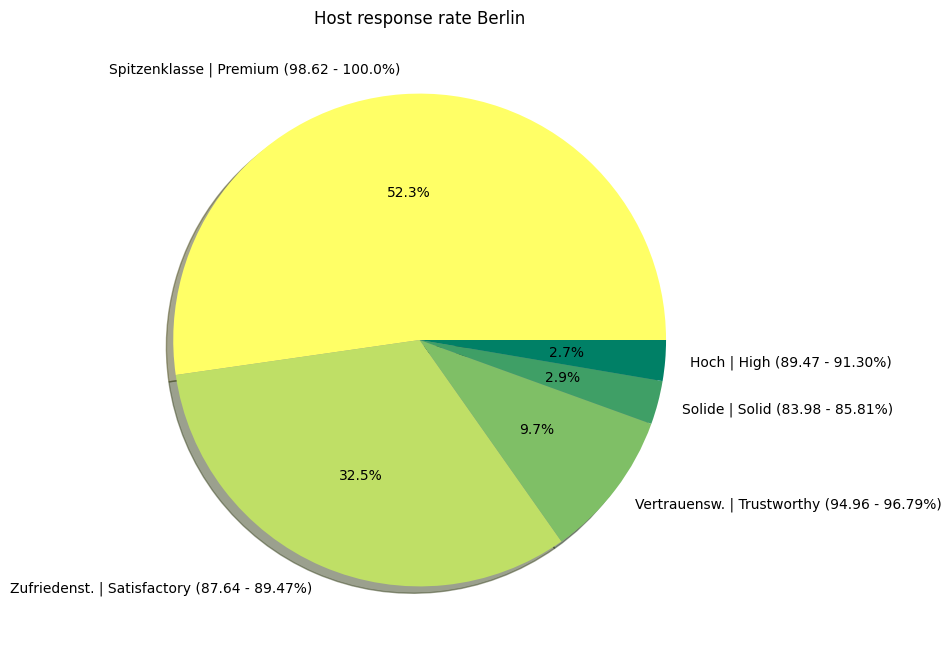

In [12]:
# Análisis univariado host_response_rate
Tabla_freq_host_response_rate = df_extrac['host_response_rate_cat'].value_counts().reset_index()
Tabla_freq_host_response_rate

# Filtro de valores más relevantes de la variable categórica
Filtro_time_host_r = Tabla_freq_host_response_rate[Tabla_freq_host_response_rate['count'] > 1].head(5)
Filtro_time_host_r

# Ajustar el índice del DF
Filtro_index_host_r = Filtro_time_host_r.set_index('host_response_rate_cat')
Filtro_index_host_r

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_host_r['count'].plot(kind= 'pie', figsize= (10,8), shadow = True, autopct = "%0.1f%%", colormap = 'summer_r')
plt.title('Host response rate Berlin')
plt.ylabel("")

Interpretación:

Se puede observar que el top 5 de la tasa de respuesta por parte del host es alta, pues todos se encontran por arriba del 89%, dentro de la cual, Premium con 98.46-100% se lleva el top2 con un 32.9%, pero en general se observa que la tasa de respuesta por parte de los hosts en Berlin, Alemania es bastante solida y buena.

In [13]:
#host_total_listings_count
#Calculamos el número total de la población "n"
df_extrac['host_total_listings_count'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_list = df_extrac['host_total_listings_count'].max() #16
Min_list  = df_extrac['host_total_listings_count'].min() #0
Limites_list = [Min_list, Max_list]
print(Limites_list)

# Rango R
R_list = Max_list - Min_list
print("Rango: ",R_list) #16

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_list = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_list) #14.78

# Calculamos el ancho del intervalo "i"
i_list = R_list/ni_list
print("Ancho del intervalo: ",i_list) #1

intervalos_list = np.linspace(0, 16,16) # se le resta un decimal al del inicio y se le suma un decimal al final
print(intervalos_list)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_list = ["Einzellisting | Single host (0 - 1)",
    "Klein | Small (1 - 2)",
    "Kompakt | Compact (2 - 3)",
    "Lokal | Local (3 - 4)",
    "Beginnend | Emerging (4 - 5)",
    "Ausgebaut | Expanded (5 - 6)",
    "Etabliert | Established (6 - 7)",
    "Mehrfach | Multi-listing (7 - 8)",
    "Vernetzt | Networked (8 - 9)",
    "Regional | Regional (9 - 10)",
    "Groß | Large (10 - 11)",
    "Sehr groß | Very large (11 - 12)",
    "Betreiber | Operator (12 - 13)",
    "Professionell | Professional (13 - 14)",
    "Konzern | Corporate (14 - 16)"]

# Creando las categorias en la columna
df_extrac['host_total_listings_count_cat'] = pd.cut(x = df_extrac['host_total_listings_count'], bins = intervalos_list, labels = categorias_list)
df_extrac[['host_total_listings_count', 'host_total_listings_count_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(0.0), np.float64(16.0)]
Rango:  16.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  1.082230827888238
[ 0.          1.06666667  2.13333333  3.2         4.26666667  5.33333333
  6.4         7.46666667  8.53333333  9.6        10.66666667 11.73333333
 12.8        13.86666667 14.93333333 16.        ]


,host_total_listings_count,host_total_listings_count_cat
0,1.0,Einzellisting | Single host (0 - 1)
1,1.0,Einzellisting | Single host (0 - 1)
2,5.0,Beginnend | Emerging (4 - 5)
3,4.0,Lokal | Local (3 - 4)
4,5.0,Beginnend | Emerging (4 - 5)
5,4.0,Lokal | Local (3 - 4)
6,5.0,Beginnend | Emerging (4 - 5)
7,1.0,Einzellisting | Single host (0 - 1)
8,1.0,Einzellisting | Single host (0 - 1)
9,5.0,Beginnend | Emerging (4 - 5)


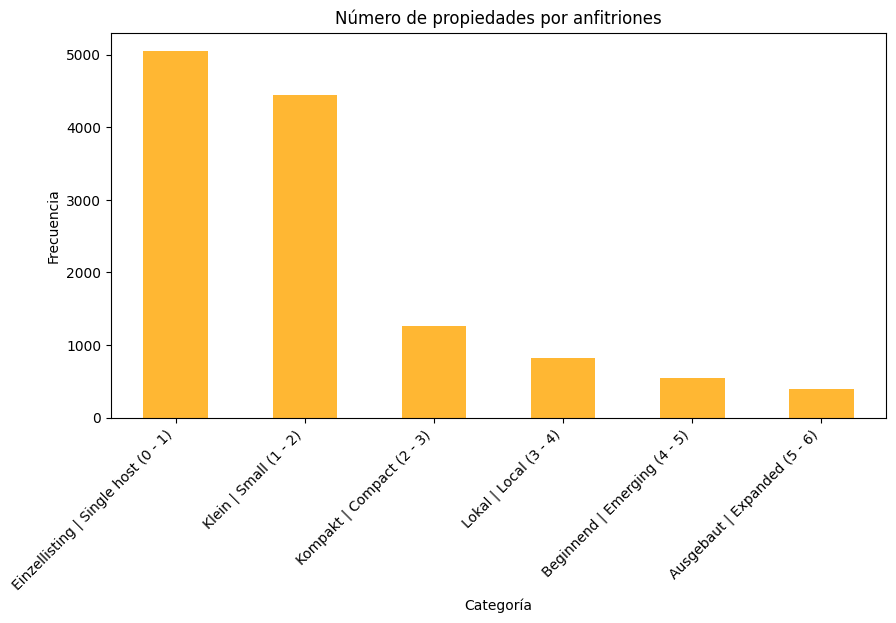

In [14]:
# Análisis univariado host_total_listings_count
Tabla_freq_list = df_extrac['host_total_listings_count_cat'].value_counts().reset_index()
Tabla_freq_list.columns = ['host_total_listings_count_cat','count']

Filtro_list = Tabla_freq_list[Tabla_freq_list['count'] > 1].head(6)
Filtro_index_list = Filtro_list.set_index('host_total_listings_count_cat')

# Gráfica
Filtro_index_list['count'].plot(kind='bar', figsize=(10,5), color="orange", alpha=0.8)
plt.title('Número de propiedades por anfitriones')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frecuencia')
plt.show()

Interpretación:

Podemos observar que dentro del top 5, la mayoría de host, solo ofrecen un alojamiento, seguidos de los pequeños, siendo los últimos dentro del top 5 con 4-5 a alojamientos, y es aquí donde se puede enfatizar o realizar un análisis mas profundo con estas 5 categorías y observar el comportamiento de otras variables.

In [15]:
#accomodates
#Calculamos el número total de la población "n"
df_extrac['accommodates'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_acco = df_extrac['accommodates'].max() #7
Min_acco  = df_extrac['accommodates'].min() #1
Limites_acco = [Min_acco, Max_acco]
print(Limites_acco)

# Rango R
R_acco = Max_acco - Min_acco
print("Rango: ",R_acco) #6

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_acco = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_acco) #14.78

# Calculamos el ancho del intervalo "i"
i_acco = R_acco/ni_acco
print("Ancho del intervalo: ",i_acco) #0.405

intervalos_acco = np.linspace(0.99, 7,8) # se le resta un decimal al del inicio y se le suma un decimal al final, ajustado para evitar datos decimales y trabajar con enteros
print(intervalos_acco)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_acco = ["1 Gast | 1 guest", "2 Gäste | 2 guests", "3 Gäste | 3 guests",
    "4 Gäste | 4 guests", "5 Gäste | 5 guests", "6 Gäste | 6 guests",
    "7 Gäste | 7 guests"]

# Creando las categorias en la columna
df_extrac['accommodates_cat'] = pd.cut(x = df_extrac['accommodates'], bins = intervalos_acco, labels = categorias_acco)
df_extrac[['accommodates', 'accommodates_cat']].head(20)



<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(1.0), np.float64(7.0)]
Rango:  6.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  0.40583656045808925
[0.99       1.84857143 2.70714286 3.56571429 4.42428571 5.28285714
 6.14142857 7.        ]


,accommodates,accommodates_cat
0,2.0,2 Gäste | 2 guests
1,7.0,7 Gäste | 7 guests
2,1.0,1 Gast | 1 guest
3,4.0,4 Gäste | 4 guests
4,2.0,2 Gäste | 2 guests
5,2.0,2 Gäste | 2 guests
6,2.0,2 Gäste | 2 guests
7,6.0,6 Gäste | 6 guests
8,4.0,4 Gäste | 4 guests
9,4.0,4 Gäste | 4 guests


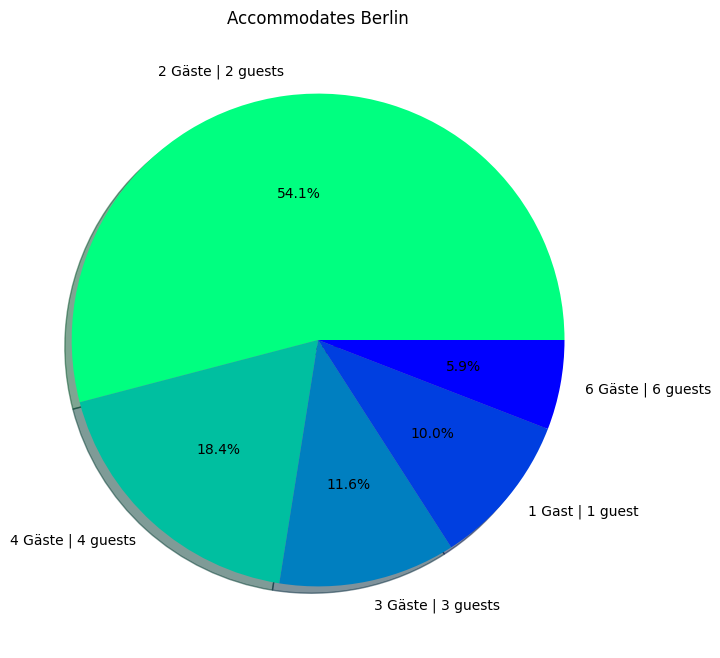

In [16]:
# Análisis univariado accommodates
Tabla_freq_acco = df_extrac['accommodates_cat'].value_counts().reset_index()
Tabla_freq_acco.columns = ['accommodates_cat','count']

Filtro_acco = Tabla_freq_acco[Tabla_freq_acco['count'] > 1].head(5)
Filtro_index_acco = Filtro_acco.set_index('accommodates_cat')

# Gráfica de pastel
Filtro_index_acco['count'].plot(kind='pie', figsize=(8,8), autopct='%0.1f%%', shadow=True, colormap='winter_r')
plt.title('Accommodates Berlin')
plt.ylabel('')
plt.show()

Interpretación:

Podemos observar que para Berlin, dentro del top 5 para la capacidad máxima por alojamientos, la que lidera con el 54.1% es de 2 invitados, seguidos de 4 invitados, por lo que sería ideal realizar una segmentación sobre las distintas capacidades para los alojamientos, y ver su fluctuabilidad en otras variables.

In [ ]:
#price
#Calculamos el número total de la población "n"
df_extrac['price'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_price = df_extrac['price'].max() #299
Min_price  = df_extrac['price'].min() #5
Limites_price = [Min_price, Max_price]
print(Limites_price)

# Rango R
R_price = Max_price - Min_price
print("Rango: ",R_price) #294

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_price = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_price) #14.78

# Calculamos el ancho del intervalo "i"
i_price = R_price/ni_price
print("Ancho del intervalo: ",i_price) #19.89

intervalos_price = np.linspace(4.99, 299.01,16) # se le resta un decimal al del inicio y se le suma un decimal al final
print(intervalos_price)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_price = [ "Sehr günstig | Very cheap (5 - 25€)",
    "Günstig | Cheap (25 - 45€)",
    "Preiswert | Budget (45 - 65€)",
    "Erschwinglich | Affordable (65 - 85€)",
    "Standard (85 - 105€)",
    "Komfort (105 - 125€)",
    "Mittelklasse | Mid-range (125 - 145€)",
    "Oberklasse | Upper (145 - 165€)",
    "Premium | Premium (165 - 185€)",
    "Teuer | Expensive (185 - 205€)",
    "Sehr teuer | Very expensive (205 - 225€)",
    "Luxus | Luxury (225 - 245€)",
    "Exklusiv | Exclusive (245 - 265€)",
    "High-End | High-end (265 - 285€)",
    "Elite | Elite (285 - 300€)"]

# Creando las categorias en la columna
df_extrac['price_cat'] = pd.cut(x = df_extrac['price'], bins = intervalos_price, labels = categorias_price)
df_extrac[['price', 'price_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: price
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(5.0), np.float64(299.0)]
Rango:  294.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  19.885991462446373
[  4.99        24.59133333  44.19266667  63.794       83.39533333
 102.99666667 122.598      142.19933333 161.80066667 181.402
 201.00333333 220.60466667 240.206      259.80733333 279.40866667
 299.01      ]


,price,price_cat
0,105.000000,Komfort (105 - 125€)
1,135.000000,Mittelklasse | Mid-range (125 - 145€)
2,75.000000,Erschwinglich | Affordable (65 - 85€)
3,173.672536,Premium | Premium (165 - 185€)
4,28.000000,Günstig | Cheap (25 - 45€)
5,173.672536,Premium | Premium (165 - 185€)
6,53.000000,Preiswert | Budget (45 - 65€)
7,164.000000,Premium | Premium (165 - 185€)
8,173.672536,Premium | Premium (165 - 185€)
9,260.000000,High-End | High-end (265 - 285€)


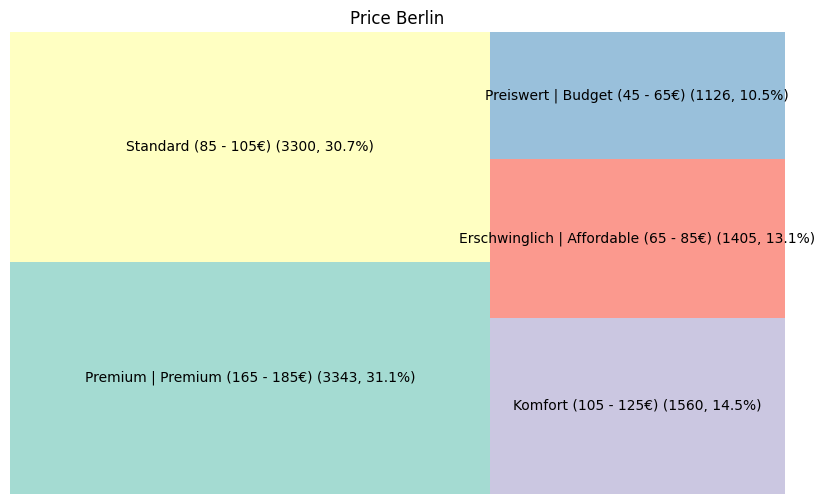

In [33]:
# Análisis univariado price
Tabla_freq_price = df_extrac['price_cat'].value_counts().reset_index()
Tabla_freq_price.columns = ['price_cat','count']

Filtro_price = Tabla_freq_price[Tabla_freq_price['count'] > 1].head(5)

# Ajustar el índice del DF
Filtro_index_price = Filtro_price.set_index('price_cat')
Filtro_index_price

# Calcular porcentajes
Filtro_index_price['Porcentaje'] = (Filtro_index_price['count'] / Filtro_index_price['count'].sum()) * 100

# Crear etiquetas con nombre + conteo + porcentaje
labels = [
    f"{name} ({count}, {pct:.1f}%)"
    for name, count, pct in zip(Filtro_index_price.index,
                                Filtro_index_price['count'],
                                Filtro_index_price['Porcentaje'])
]

# Gráfica treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=Filtro_index_price['count'],
    label=labels,
    alpha=0.8,
    color=plt.cm.Set3.colors,
    text_kwargs={'fontsize':10}  # para ajustar tamaño del texto
)

plt.title("Price Berlin")
plt.axis("off")
plt.show()

Interpretación
La mayoría de los prices en Berlin, rondan entre standards y premium, de ahí salen 3 categorías mas, con 2 rangos de precio inferio a Standard y 1 mayor.

In [36]:
#maximum_nights_avg_ntm
#Calculamos el número total de la población "n"
df_extrac['maximum_nights_avg_ntm'].info()
n = 14187

# Obtener límites
Max_max_ntm = df_extrac['maximum_nights_avg_ntm'].max() #1414
Min_max_ntm = df_extrac['maximum_nights_avg_ntm'].min() #1
Limites_max_ntm = [Min_max_ntm, Max_max_ntm]
print(Limites_max_ntm) 

# Rango
R_max_ntm = Max_max_ntm - Min_max_ntm
print("Rango: ", R_max_ntm) #1413

# Número de intervalos (Sturges)
ni_max_ntm = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_max_ntm) #14.78

# Ancho del intervalo i
i_max_ntm = R_max_ntm / ni_max_ntm
print("Ancho del intervalo: ", i_max_ntm) #95.57

intervalos_max_ntm = np.linspace(Min_max_ntm - 0.01, Max_max_ntm + 0.01, 16)
print(intervalos_max_ntm)

# Categorías (rellenar según intervalos)
categorias_max_ntm = ["Sehr kurz | Very short (1 - 95)", 
    "Kurz | Short (96 - 189 )", 
    "Relativ kurz | Relatively short (190 - 283)", 
    "Mittellang | Mid-length (284 - 377)", 
    "Erweitert | Extended (378 - 471)", 
    "Lang | Long (472 - 565)", 
    "Sehr lang | Very long (566 - 659)", 
    "Saison | Seasonal (660 - 753)", 
    "Ausgedehnt | Prolonged (754 - 847)", 
    "Jahresnah | Year-like (848 - 941)", 
    "Mehr als ein Jahr | Beyond a year (942 - 1035)", 
    "Langfristig | Long-term (1036 - 1129)", 
    "Sehr langfristig | Very long-term (1130 - 1223)", 
    "Extrem | Extreme (1224 - 1317)", 
    "Außergewöhnlich | Exceptional (1318 - 1414)"]

# Nueva columna
df_extrac['maximum_nights_avg_ntm_cat'] = pd.cut(
    x=df_extrac['maximum_nights_avg_ntm'],
    bins=intervalos_max_ntm,
    labels=categorias_max_ntm,
    include_lowest=True,
    right=False
)

df_extrac[['maximum_nights_avg_ntm', 'maximum_nights_avg_ntm_cat']].head(20)


<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(1.0), np.float64(1414.0)]
Rango:  1413.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  95.57450998788002
[9.90000000e-01 9.51913333e+01 1.89392667e+02 2.83594000e+02
 3.77795333e+02 4.71996667e+02 5.66198000e+02 6.60399333e+02
 7.54600667e+02 8.48802000e+02 9.43003333e+02 1.03720467e+03
 1.13140600e+03 1.22560733e+03 1.31980867e+03 1.41401000e+03]


,maximum_nights_avg_ntm,maximum_nights_avg_ntm_cat
0,730.0,Saison | Seasonal (660 - 753)
1,14.0,Sehr kurz | Very short (1 - 95)
2,1125.0,Langfristig | Long-term (1036 - 1129)
3,365.0,Mittellang | Mid-length (284 - 377)
4,365.0,Mittellang | Mid-length (284 - 377)
5,730.0,Saison | Seasonal (660 - 753)
6,365.0,Mittellang | Mid-length (284 - 377)
7,30.0,Sehr kurz | Very short (1 - 95)
8,360.0,Mittellang | Mid-length (284 - 377)
9,364.0,Mittellang | Mid-length (284 - 377)


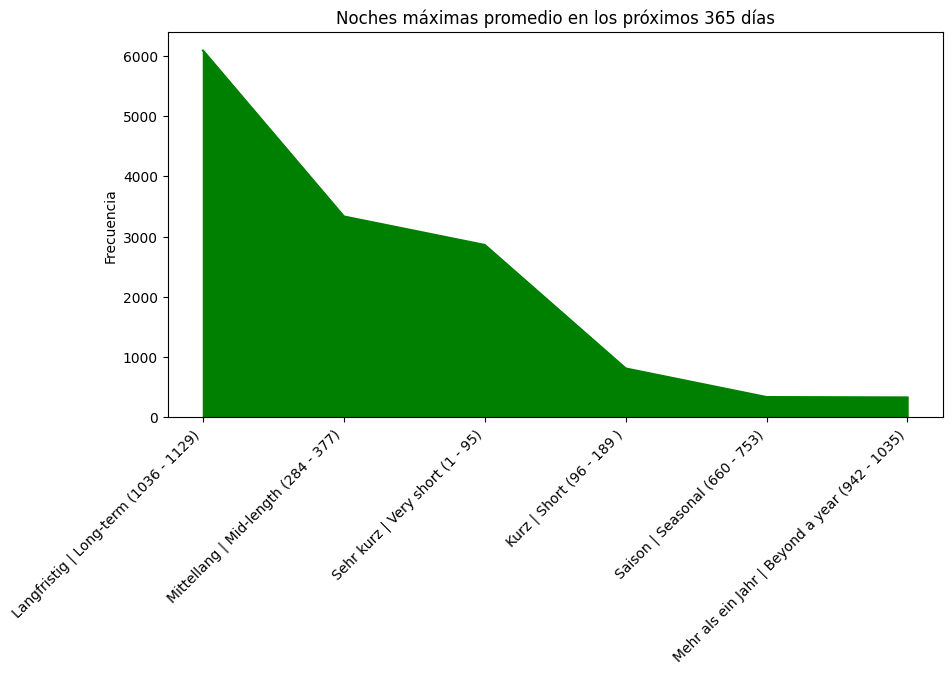

In [20]:
# Análisis univariado maximum_nights_avg_ntm
Tabla_freq_ntm = df_extrac['maximum_nights_avg_ntm_cat'].value_counts().reset_index()
Tabla_freq_ntm.columns = ['maximum_nights_avg_ntm_cat','count']

Filtro_ntm = Tabla_freq_ntm[Tabla_freq_ntm['count'] > 1].head(6)
Filtro_index_ntm = Filtro_ntm.set_index('maximum_nights_avg_ntm_cat')

# Gráfica de barras
Filtro_index_ntm['count'].plot(kind='area', figsize=(10,5), color="green")
plt.title('Noches máximas promedio en los próximos 365 días')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Interpretación

Se puede observar que la duración máxima media permitida de la estancia para los alojamientos se centra en Long-term (1036-1129 días) y Mid-length (284-377), seguido de un repentino Very short (1-95 días), lo cual se puede deducir que los airbnbs tienen una duración máxima bastante larga, y de aquí también se puede partir a más insights.


In [21]:
# review_scores_value
df_extrac['review_scores_value'].info()
n = 14187

Max_val = df_extrac['review_scores_value'].max() #5
Min_val = df_extrac['review_scores_value'].min() #1.5
Limites_val = [Min_val, Max_val]
print(Limites_val)

R_val = Max_val - Min_val
print("Rango: ", R_val) #3.5

ni_val = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_val) #14.78

i_val = R_val / ni_val
print("Ancho del intervalo: ", i_val) # 0.23

intervalos_val = np.linspace(Min_val - 0.01, Max_val + 0.01, 16)
print(intervalos_val)

categorias_val = ["Sehr schlecht | Very poor (1.50-1.73)",
    "Schlecht | Poor (1.73 - 1.96)",
    "Unzureichend | Insufficient (1.96 - 2.19)",
    "Mäßig | Fair (2.19 - 2.42)",
    "Unterdurchschnittlich | Below average (2.42 - 2.65)",
    "Durchschnittlich | Average (2.65 - 2.88)",
    "Ordentlich | Decent (2.88 - 3.11)",
    "Akzeptabel | Acceptable (3.11 - 3.34)",
    "Gut | Good (3.34 - 3.57)",
    "Sehr gut | Very good (3.57 - 3.80)",
    "Ausgezeichnet | Excellent (3.80 - 4.03)",
    "Hervorragend | Outstanding (4.03 - 4.26)",
    "Exzellent | Superb (4.26 - 4.49)",
    "Spitze | Top-rated (4.49 - 4.72)",
    "Perfekt | Perfect (4.72 - 5.00)"]

df_extrac['review_scores_value_cat'] = pd.cut(
    x=df_extrac['review_scores_value'],
    bins=intervalos_val,
    labels=categorias_val,
    include_lowest=True,
    right=False
)

df_extrac[['review_scores_value', 'review_scores_value_cat']].head(20)

<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(1.5), np.float64(5.0)]
Rango:  3.5
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  0.23673799360055206
[1.49       1.72466667 1.95933333 2.194      2.42866667 2.66333333
 2.898      3.13266667 3.36733333 3.602      3.83666667 4.07133333
 4.306      4.54066667 4.77533333 5.01      ]


,review_scores_value,review_scores_value_cat
0,4.61,Spitze | Top-rated (4.49 - 4.72)
1,4.86,Perfekt | Perfect (4.72 - 5.00)
2,4.45,Exzellent | Superb (4.26 - 4.49)
3,4.71,Spitze | Top-rated (4.49 - 4.72)
4,4.65,Spitze | Top-rated (4.49 - 4.72)
5,4.58,Spitze | Top-rated (4.49 - 4.72)
6,4.68,Spitze | Top-rated (4.49 - 4.72)
7,4.69,Spitze | Top-rated (4.49 - 4.72)
8,4.39,Exzellent | Superb (4.26 - 4.49)
9,4.45,Exzellent | Superb (4.26 - 4.49)


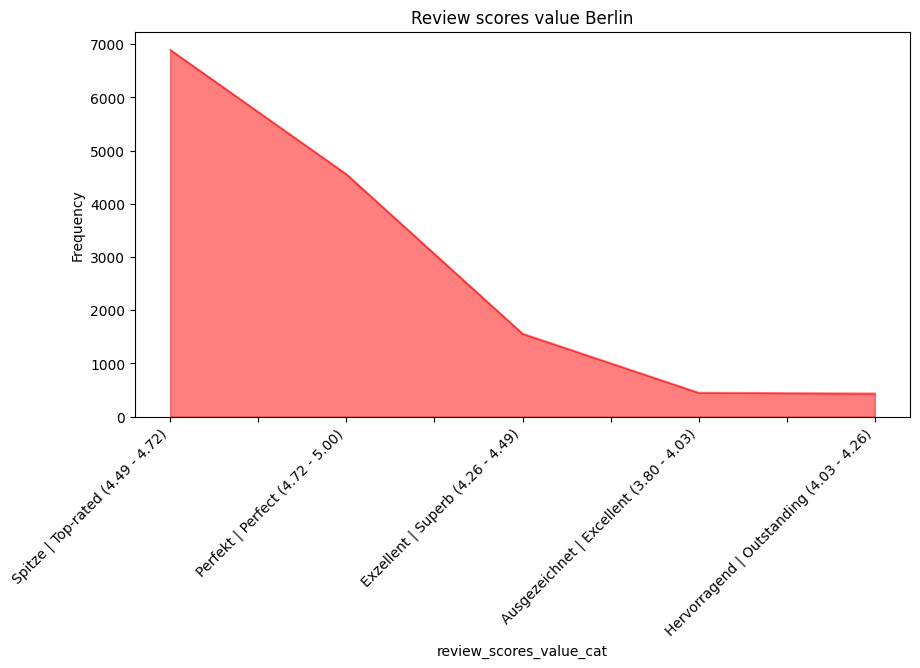

In [22]:
# Análisis univariado review_scores_value
Tabla_freq_value = df_extrac['review_scores_value_cat'].value_counts().reset_index()
Tabla_freq_value.columns = ['review_scores_value_cat','count']

Filtro_value = Tabla_freq_value[Tabla_freq_value['count'] > 1].head(5)
Filtro_index_value = Filtro_value.set_index('review_scores_value_cat')

# Area chart
Filtro_index_value['count'].plot(kind='area', figsize=(10,5), alpha=0.5, color="red")
plt.title('Review scores value Berlin')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

Interpretación:

Se puede observar que los review_scores_value, en donde los huéspedes tienden a otorgar calificaciones altas en la dimensión “value”. Esto puede significar que los precios son percibidos como justos o que los alojamientos cumplen con lo prometido. La caída en categorías más bajas sugiere que son excepciones y no la norma.